COPYRIGHT © 2018 Kiran Arun <kironni@gmail.com>

### Setup

In [18]:
# install dependencies
!rm -r Neural_Networks-101-demo
!git clone https://github.com/KiranArun/Neural_Networks-101-demo.git
!python3 /content/Neural_Networks-101-demo/scripts/setup.py helper_funcs

Cloning into 'Neural_Networks-101-demo'...
remote: Counting objects: 312, done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 312 (delta 14), reused 28 (delta 6), pack-reused 271
Receiving objects: 100% (312/312), 5.58 MiB | 34.60 MiB/s, done.
Resolving deltas: 100% (137/137), done.
Getting helper functions...


# MNIST Handwritten Digits Classifier

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import helper_funcs as helper

In [20]:
# this is the directory where we will keep and external files, eg. data, logs
model_root_dir = '/content/Neural_Networks-101-demo/'

# get data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(model_root_dir+'MNIST_data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /content/Neural_Networks-101-demo/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /content/Neural_Networks-101-demo/MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /content/Neural_Networks-101-demo/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /content/Neural_Networks-101-demo/MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
image_dims = (28,28)
input_size = 28**2
num_classes = 10

In [0]:
# Hyperparams

batch_size = 100
learning_rate = 0.1

epochs = 2
iterations = mnist.train.num_examples//batch_size

hidden_size = 256

In [0]:
tf.reset_default_graph()

In [0]:
# input placeholders
X_placeholder = tf.placeholder(shape=[None, input_size], dtype=tf.float32, name='X_placeholder')
Y_placeholder = tf.placeholder(shape=[None, num_classes], dtype=tf.int64, name='Y_placeholder')

In [0]:
# Variables

W1 = tf.Variable(np.random.randn(input_size, hidden_size), dtype=tf.float32, name='W1')
b1 = tf.Variable(np.random.randn(hidden_size), dtype=tf.float32, name='b1')

W2 = tf.Variable(np.random.randn(hidden_size, num_classes), dtype=tf.float32, name='W2')
b2 = tf.Variable(np.random.randn(num_classes), dtype=tf.float32, name='b2')

In [0]:
# input to hidden
hidden = tf.nn.relu(tf.matmul(X_placeholder, W1) + b1)

# hidden to output
Y_prediction = tf.matmul(hidden, W2) + b2

In [0]:
# loss function softmax cross entropy
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y_placeholder, logits=Y_prediction, name='loss'))

In [0]:
# optimizer
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [0]:
# accuracy
correct_prediction = tf.equal(tf.argmax(Y_prediction, 1), tf.argmax(Y_placeholder, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
predictions = tf.nn.softmax(Y_prediction)

In [30]:
# Initialize our session and vars
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [31]:
# initialize empty array to hold losses for each training step
losses = np.array([])

for epoch in range(epochs):
    print('New epoch', str(epoch+1)+'/'+str(epochs))
    for idx in range(iterations):

        # get batches of training data for current step
        batch_xs, batch_ys = mnist.train.next_batch(batch_size, shuffle=True)

        # run training step and get loss values to plot later
        _, _loss = sess.run([train_step, loss], 
                            feed_dict={
                                X_placeholder: batch_xs,
                                Y_placeholder: batch_ys
                            })

        if (idx+1) % (iterations/5) == 0:

            # get accuracy using validation set
            _accuracy = sess.run(accuracy, feed_dict={X_placeholder : mnist.validation.images,
                                                      Y_placeholder : mnist.validation.labels
                                                     })

            # print current step, batch loss and validation accuracy
            print('step', str(idx+1)+'/'+str(iterations), 'loss', _loss, 'accuracy', str(round(100*_accuracy,2))+'%')

        # append the loss to the losses array to plot
        losses = np.append(losses, _loss)

New epoch 1/2
step 110/550 loss 3.2859037 accuracy 83.88%
step 220/550 loss 7.794597 accuracy 86.44%
step 330/550 loss 1.6230599 accuracy 88.56%
step 440/550 loss 3.5344856 accuracy 89.32%
step 550/550 loss 2.4251122 accuracy 90.4%
New epoch 2/2
step 110/550 loss 2.4556763 accuracy 90.88%
step 220/550 loss 2.5454884 accuracy 91.2%
step 330/550 loss 2.340122 accuracy 91.5%
step 440/550 loss 2.0529695 accuracy 91.84%
step 550/550 loss 0.46225768 accuracy 92.02%


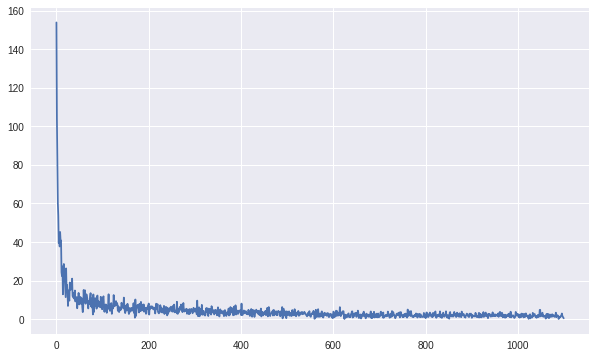

In [32]:
# plot training losses

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(losses)
ax.grid(True)

In [33]:
# find accuracy on test set
_accuracy = sess.run(accuracy, feed_dict={X_placeholder : mnist.test.images,
                                          Y_placeholder : mnist.test.labels
                                         })

print(str(round(100*_accuracy,2))+'%')

91.93%


prediction: 2 answer: 2
0 0.0%
1 0.0%
2 100.0%
3 0.0%
4 0.0%
5 0.0%
6 0.0%
7 0.0%
8 0.0%
9 0.0%


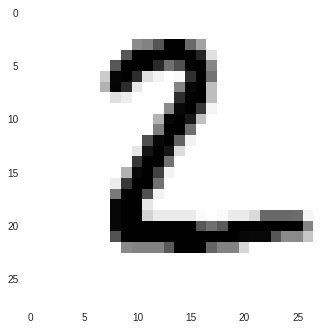

prediction: 6 answer: 6
0 0.0%
1 0.0%
2 0.0%
3 0.0%
4 0.0%
5 0.0%
6 100.0%
7 0.0%
8 0.0%
9 0.0%


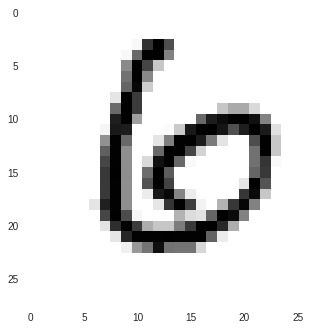

In [34]:
# show test images with prediction probabilities

test_idxs = [1,11]

for test_idx in test_idxs:
    
    test_x, test_y = mnist.test.images[test_idx], mnist.test.labels[test_idx]
    _prediction = sess.run(predictions, feed_dict={X_placeholder: test_x.reshape(1,-1)})
    print('prediction:', np.argmax(_prediction), 'answer:', np.argmax(test_y))

    for i,val in enumerate(_prediction[0]):
        print(i, str(round(100*val,3))+'%')

    plt.imshow(test_x.reshape(image_dims), cmap='binary')
    plt.grid(False)
    plt.show()